In [133]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [134]:
N = 30
T = 150
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
s = np.zeros(N)
R = np.zeros(N)
S = np.zeros(T + 1)
I = np.zeros(T + 1)
Rc = np.zeros(T + 1)
Ic = np.zeros(T + 1)
Np = np.zeros(T + 1)
recovery = 40
dt = 1
speed = 0.03
distance = 0.06


In [135]:
def dist(p, q):
    tmp = np.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)
    return tmp


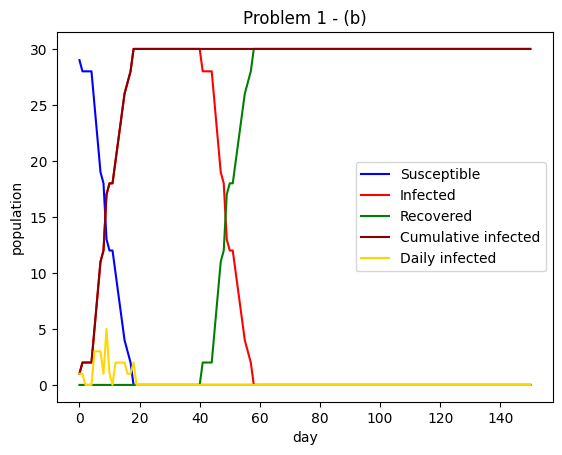

In [136]:
for p in range(N):
    x[p] = np.random.rand() / 2
    y[p] = np.random.rand() / 2
    theta = 2 * np.pi * np.random.rand()
    vx[p] = speed * np.cos(theta)
    vy[p] = speed * np.sin(theta)
x[0] = 0.25
y[0] = 0.25
s[0] = 1
S[0] = 29
I[0] = 1
Ic[0] = 1
Np[0] = 1
for t in range(1, T + 1):
    for p in range(N):
        x[p] = x[p] + dt * vx[p]
        y[p] = y[p] + dt * vy[p]
        if x[p] >= 0.45:
            vx[p] = -abs(vx[p])
        elif x[p] <= 0.05:
            vx[p] = abs(vx[p])
        if y[p] >= 0.45:
            vy[p] = -abs(vy[p])
        elif y[p] <= 0.05:
            vy[p] = abs(vy[p])
    stmp = np.zeros(N)  # try to understand this step
    stmp = s
    newinfection = 0
    for p in range(N):
        for q in range(N):
            if s[p] == 1 and s[q] == 0:
                pc = [x[p], y[p]]
                qc = [x[q], y[q]]
                tmp = dist(pc, qc)
                if tmp <= distance:
                    stmp[q] = 1
                    newinfection = newinfection + 1
    s = stmp
    Ic[t] = Ic[t - 1] + newinfection
    Np[t] = newinfection
    for p in range(N):
        if s[p] == 1:
            R[p] = R[p] + 1
        if s[p] == 1 and R[p] > recovery:
            s[p] = 2
    for p in range(N):
        if s[p] == 0:
            S[t] += 1
        elif s[p] == 1:
            I[t] += 1
        else:
            Rc[t] += 1
plt.plot(range(T + 1), S, 'b', label='Susceptible')
plt.plot(range(T + 1), I, 'r', label='Infected')
plt.plot(range(T + 1), Rc, 'g', label='Recovered')
plt.plot(range(T + 1), Ic, 'darkred', label='Cumulative infected')
plt.plot(range(T + 1), Np, 'gold', label='Daily infected')
plt.xlabel('day')
plt.ylabel('population')
plt.title("Problem 1 - (b)")
plt.legend()
plt.show()
